<a href="https://colab.research.google.com/github/Heemang221/covid19/blob/master/SEIR_0924_gn_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [ ]:
## CASE 1. 사랑제일교회 사건부터 시작. (8월 12일~) R0를 3으로 가정한다.
# The SIR model differential equations.
def deriv(state, t, N, sigma,beta, gamma):
    S, E, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

In [ ]:
#R0는 이태원 집단 감염은 2.69, 신천지 집단 감염은 3.53.이므로 임의로 3으로 가정한다.
RO = 3 

latent_period = 1/4 #잠복율 (평균값)
recovery_rate = 1/14 #회복율 (평균값)

#effective_contact_rate = transmission rate * contact rate (감염확률 * 접촉수). 가정한 R0로 베타를 추정한다.
effective_contact_rate = RO * recovery_rate 
print("R0 is", RO)

# 날짜 기준: 8월 12일
total_pop = 13731651
exposed = 19 #검사중
recovered = 1490
infected = 1687
susceptible = total_pop - infected - recovered - exposed

# start date :2020.08.12 
days=range(0,120)

# Use differential equations magic with our population
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# days를 날짜로 변환
day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-08-12", '%Y-%m-%d').date()
end_date = start_date + 120*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))


# Build a dataframe
df = pd.DataFrame({
    'suseptible': S,
    'exposed':E,
    'infected': I,
    'recovered': R,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'exposed','suseptible', 'recovered'],
        color=['#bb6424','#ffffff', '#aac6ca', '#cc8ac0'],
        kind='area',
        figsize = (12,6),
        ylim = [0,10000],
        stacked=True)

R0 is 3


<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
filename = '/content/date.csv'
df3 = pd.read_csv(filename, header=0)
df3.head()
df3 = df3.loc[:, ['days', 'acc_count']]
df3.head()

,days,acc_count
0,0,1686
1,1,1728
2,2,1839
3,3,1917
4,4,1992


In [ ]:
# Build a dataframe because why not

df2 = pd.DataFrame({
    'infected': I,
    'days': days
})

df2.head()

dfdf = pd.merge(df2, df3, on="days")
dfdf.head()

,infected,days,acc_count
0,1.000000,0,1686
1,1.170911,1,1728
2,1.333124,2,1839
3,1.494315,3,1917
4,1.660011,4,1992


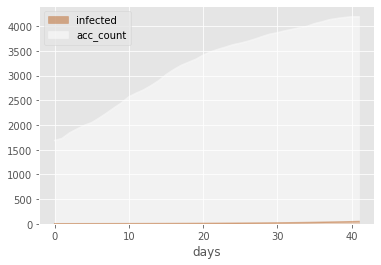

In [ ]:
plt.style.use('ggplot')
dfdf.plot(x= 'days',
        y=['infected', 'acc_count'],
        color=['#bb6424','#ffffff'],
        kind='area',
        stacked=False)

In [ ]:
#감염자만 보기

def adjust_rate(contact_rate, day):
    if day > 0:
        return contact_rate
    else:
        return contact_rate

# The SIR model differential equations.
def deriv_adjusted(state, t, N, sigma, beta, gamma):
    S, E, I, R = state
    
    beta = adjust_rate(beta, t)
    # Change in S population over time
    dSdt = -beta * S * I / N
    # Change in S population over time
    dEdt = beta * S * I / N - sigma * E
    # Change in I population over time
    dIdt = sigma*E - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt,dEdt,dIdt, dRdt

In [ ]:
RO = 3 #이태원 집단 감염은 2.69, 신천지 집단 감염은 3.53.이므로 임의로 3으로 가정
latent_period = 1/4
recovery_rate = 1/14
effective_contact_rate = RO * recovery_rate #transmission rate * contact rate (감염확률 * 접촉수)


# We'll compute this for fun
print("R0 is", RO)

# 날짜 기준: 8월 12일
total_pop = 13731651
exposed = 19 #51 #검사중을 넣음
recovered = 1490
infected = 1687
susceptible = total_pop - infected - recovered - exposed


# A list of days
days = range(0, 60)

# First do it with our original derivation...
ret = odeint(deriv,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S, E, I, R = ret.T

# ...then do it again with the adjusted one.
ret = odeint(deriv_adjusted,
             [susceptible, exposed, infected, recovered],
             days,
             args=(total_pop, latent_period, effective_contact_rate, recovery_rate))
S_adj, E_adj, I_adj, R_adj = ret.T

day_delta = timedelta(days=1)
start_date = datetime.strptime("2020-08-12", '%Y-%m-%d').date()
end_date = start_date + 60*day_delta
days=[]
for i in range((end_date - start_date).days):
  days.append(str(start_date + i*day_delta))

# Build a dataframe because why not
df = pd.DataFrame({
    'infected': I,
    'infected_lockdown': I_adj,
    'day': days
})

plt.style.use('ggplot')
df.plot(x='day',
        y=['infected', 'infected_lockdown'],
        figsize = (12,6),
        ylim = [0,10000],
        stacked=False)



R0 is 3


<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive
